# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Step 2: Load the Dataset

In [2]:
data = pd.read_csv('music_dataset_mod.csv')
data

Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0    114.618354       57.976367       53.251766            99.061840   
1    116.672803       69.387087       95.787280            90.831033   
2    128.328121       52.930677       65.701187           104.439247   
3    128.511337       25.494755       14.095374            40.106130   
4    135.474190       45.174876      101.469872            70.002203   
..          ...             ...             ...                  ...   
995   66.578839       54.533872       99.782246            95.633310   
996  126.570862       57.812829       90.809940            64.880583   
997  121.731543       51.385204       33.849400            17.044544   
998   97.070804       19.210429       62.662860            22.720453   
999   71.050781       32.967250       62.875776            78.868747   

     String Instrument Detection  Electronic Element Presence  \
0                      14.686768                    17.628630   
1                      47.280419                   -15.618194   
2                       5.984994                    50.467388   
3                      47.715584                    87.335201   
4                     108.177637                    25.865590   
..                           ...                          ...   
995                    91.414514                    19.396142   
996                    40.437517                    38.051344   
997                    84.483481                    13.312790   
998                    66.917937                    80.590809   
999                    88.094454                    59.148014   

     Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0            46.545522        75.839434         79.378892          71.753088   
1            85.421085       100.455908          0.713015           0.000000   
2            18.006722        77.642913         80.652946          87.692110   
3            68.603329        63.536557         74.888346          76.239108   
4            31.295163        81.121030         36.178193          23.381542   
..                 ...              ...               ...                ...   
995          36.280860        78.298955          4.890606           4.638077   
996          66.204244        95.770959          1.745673           6.729019   
997           8.953013        64.068960         90.738580          96.043437   
998          51.403310        50.828636         68.518232          55.119045   
999          83.420324        59.582109         37.329193          44.576693   

     Ambient Sound Influence  Instrumental Overlaps      Genre  
0                  96.439665              53.771763    Country  
1                  17.327295              15.017146  Classical  
2                  95.125207              25.308020       Rock  
3                  97.016998              96.893109    Hip-hop  
4                  53.753793              30.142986    Country  
..                       ...                    ...        ...  
995                75.479656              95.990077        NaN  
996                82.042218              43.590027  Classical  
997                 5.499350              74.604889       Rock  
998                21.781372              24.716517       Rock  
999                87.458414              78.270683       Jazz  

[1000 rows x 13 columns]

# Step 3: Data Exploration

In [3]:
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dty

In [4]:
print("\nDataset Summary Statistics:")
print(data.describe())


Dataset Summary Statistics:
             Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
count  1000.000000     1000.000000     1000.000000          1000.000000   
mean    121.177891       46.684324       51.741685            54.854619   
std      19.600614       17.809545       29.008872            29.489650   
min      50.494818       -4.165724        0.408370             0.598517   
25%     107.885045       34.252531       26.635663            29.782438   
50%     121.356455       46.390854       52.245242            54.926936   
75%     135.054584       58.481545       76.919814            79.438614   
max     175.982637      104.932942      109.643123           114.949678   

       String Instrument Detection  Electronic Element Presence  \
count                  1000.000000                  1000.000000   
mean                     58.442054                    48.813244   
std                      29.650752                    33.239190   
min                       0

In [5]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64


C:\Users\Ahsan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ahsan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ahsan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ahsan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1000x800 with 0 Axes>

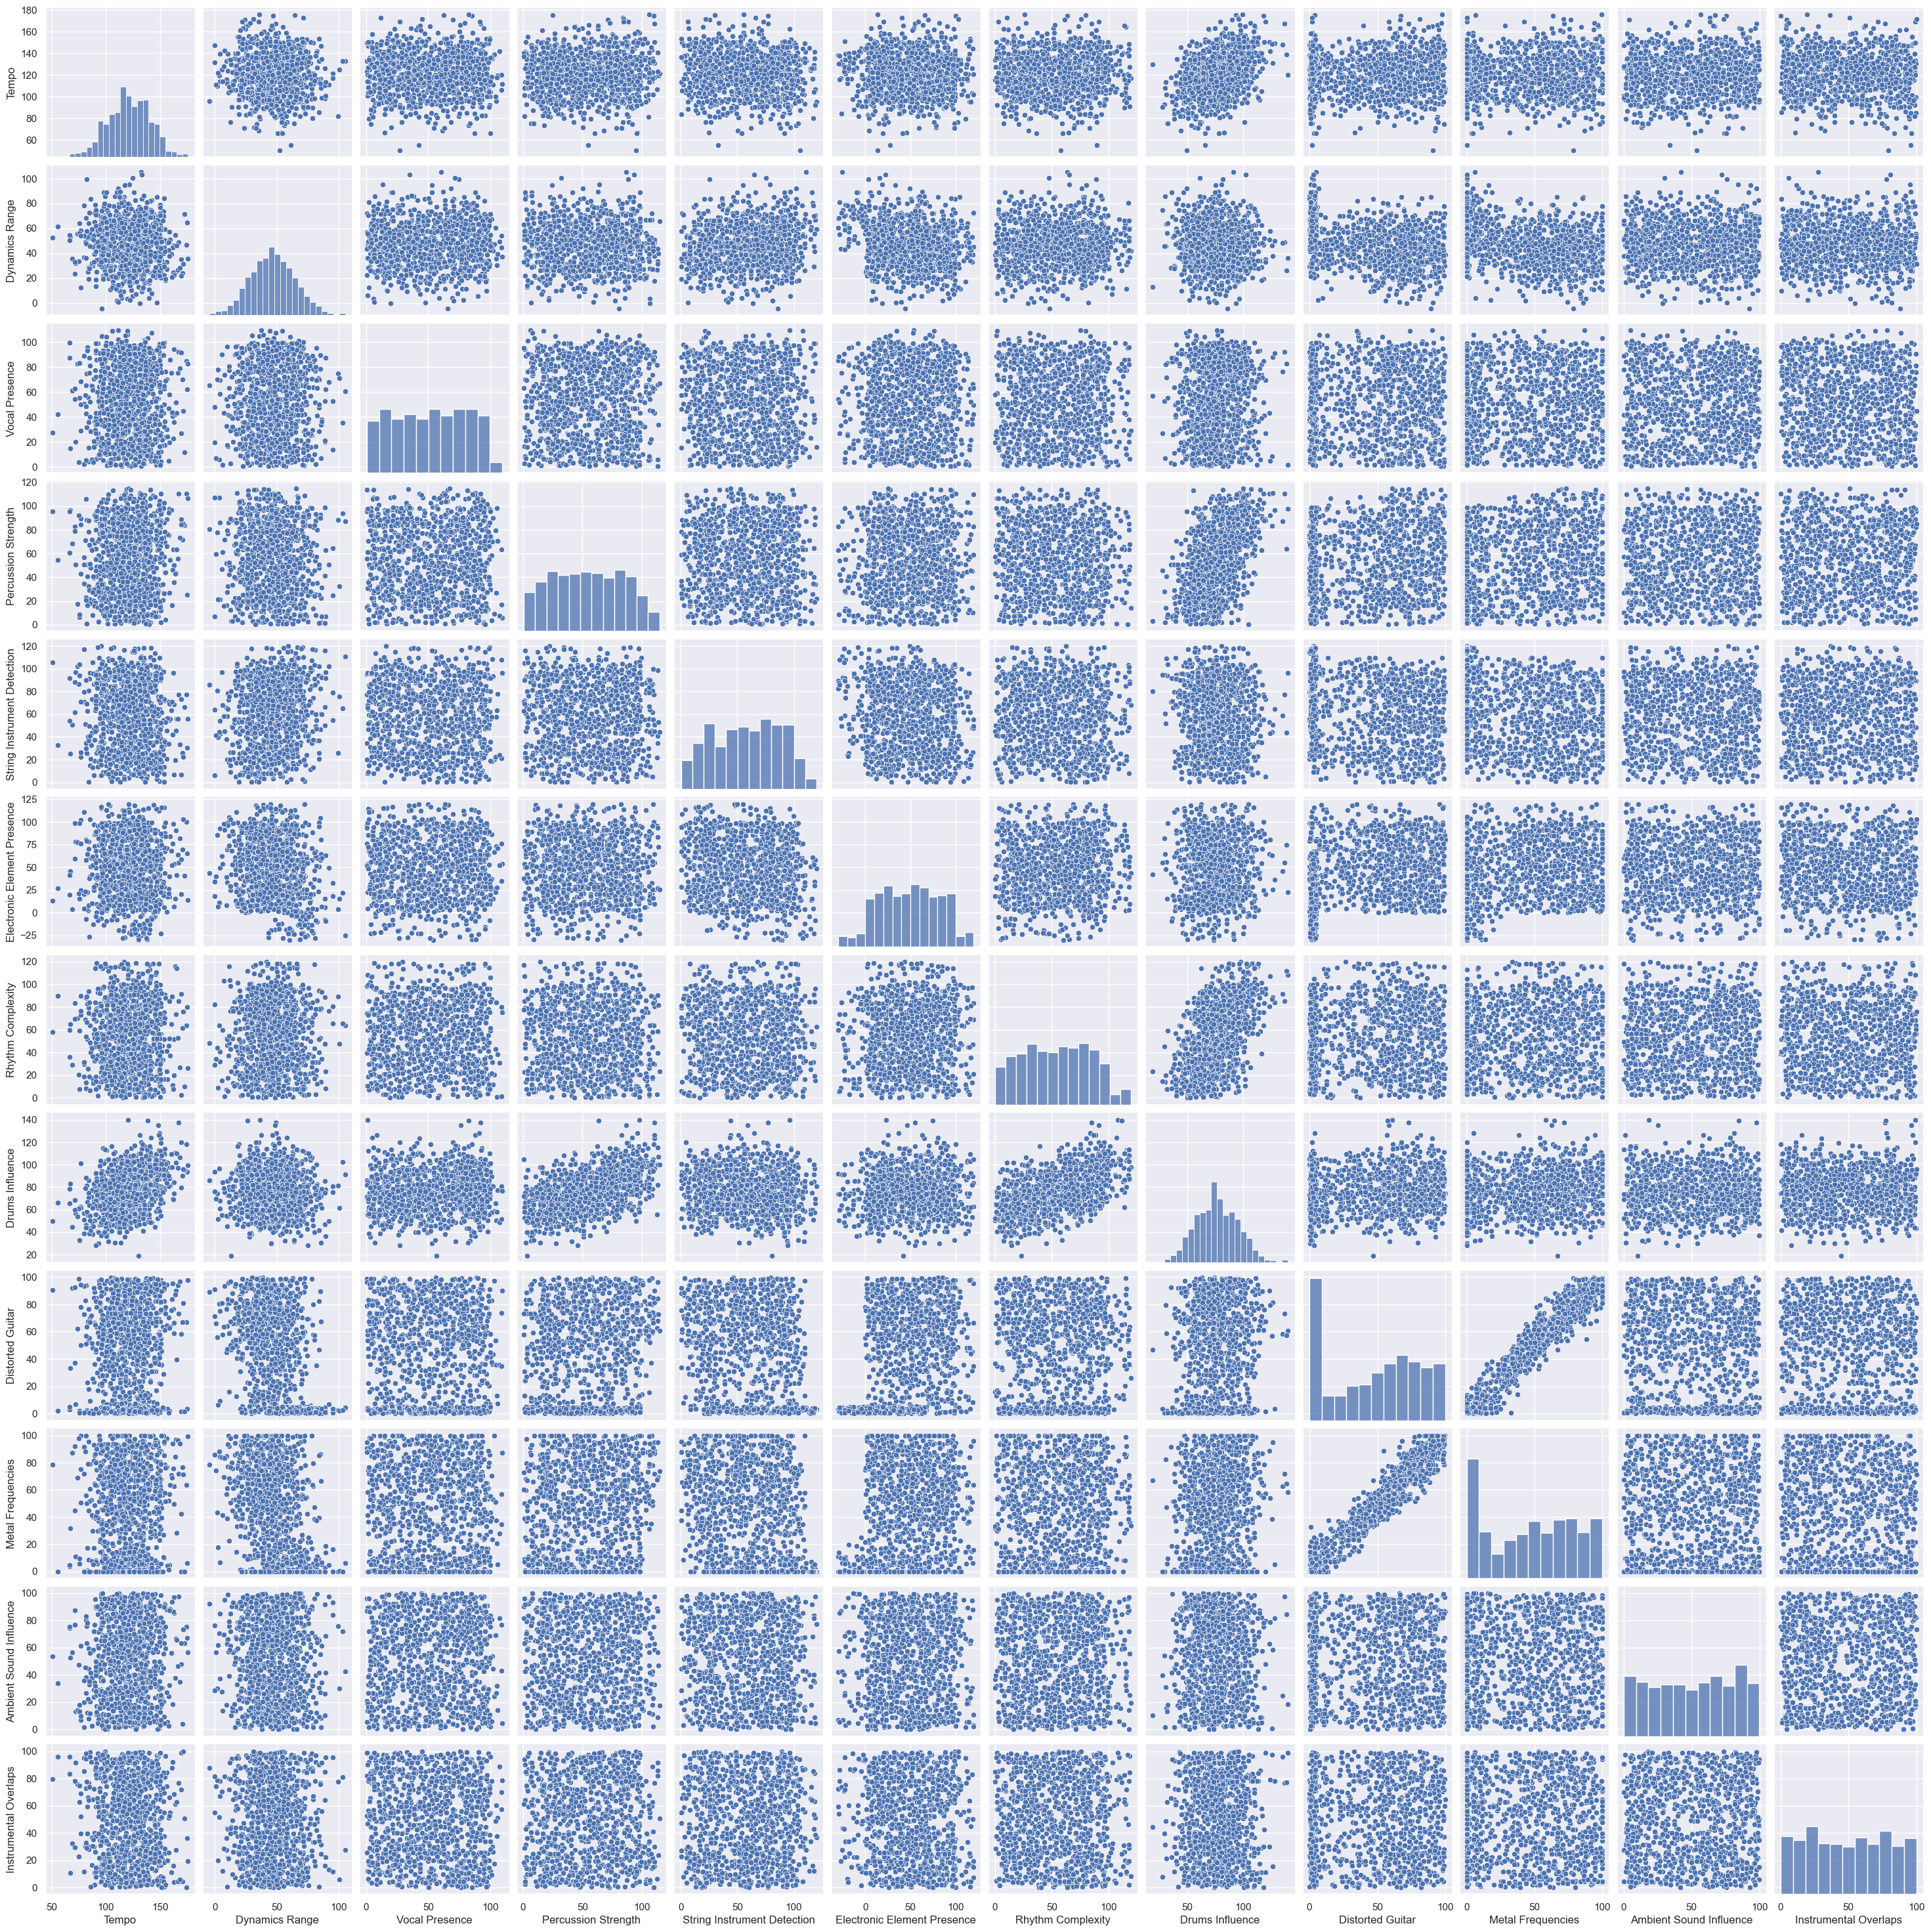

In [6]:
# Visualize distributions of a few features
plt.figure(figsize=(10, 8))
sns.pairplot(data)
plt.show()

# Step 4: Handle Missing Data

In [7]:
# Dropping rows with missing genre information (if genre column exists)
data = data.dropna(subset=['Genre'])

# Step 5: Encode the Genre Labels

In [8]:
# Encoding genre labels
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])


C:\Users\Ahsan\AppData\Local\Temp\ipykernel_15176\2910036543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Genre'] = label_encoder.fit_transform(data['Genre'])


# Step 6: Separate Features and Labels

In [9]:
# Separate features and target
X = data.drop(columns=['Genre'])
y = data['Genre']

# Step 7: Standardize the Data

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 8: Apply PCA for Dimensionality Reduction

In [11]:
# Apply PCA
pca = PCA(n_components=0.95)  # This keeps 95% of the variance
X_pca = pca.fit_transform(X_scaled)


# Step 9: Train-Test Split

In [12]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


# Step 10: Train the Logistic Regression Model

In [13]:
#Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# Step 11: Evaluate the Model

In [14]:
#Evaluate the Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5337078651685393
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.24      0.23      0.23        31
           2       0.45      0.42      0.44        33
           3       0.51      0.44      0.48        43
           4       0.43      0.56      0.49        32

    accuracy                           0.53       178
   macro avg       0.52      0.52      0.52       178
weighted avg       0.53      0.53      0.53       178



# Step 12: Visualize PCA Components (First Two)

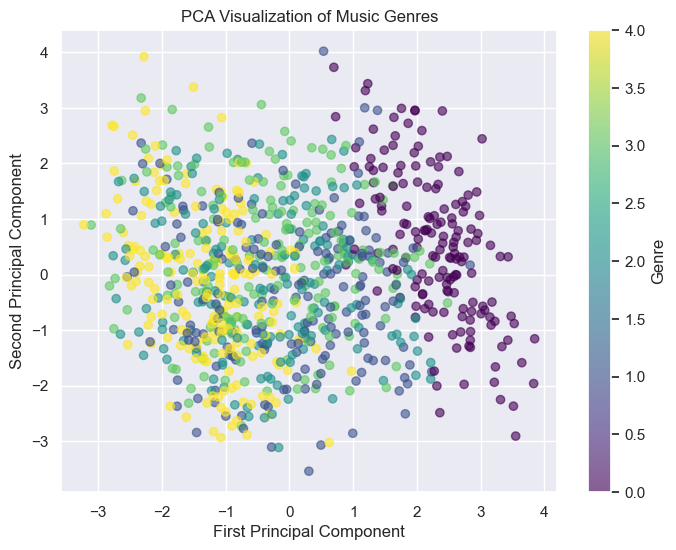

In [15]:
#Visualize PCA Components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of Music Genres')
plt.colorbar(label='Genre')
plt.show()


# THE END
# Ahsan Ali